In [1]:
from helpers import *
from implementations import *
from preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading data from CSV files

The file `data/default_values.csv` contains information about each feature

* **feature**: name of the feature

* **Value for zero**: value to replace missing values if the feature is numerical and the missing values are to be replaced by zero (ex: for `CHILDREN` 88 means 0 children)

* **Combination of other indicators**: 1 if the feature is just a combination of other features (ex: `_RFHLTH` is 1 if `GENHLTH` = 1, 2 or 3 and 2 if `GENHLTH` = 4 or 5)

* **Bad format, better format elsewhere**: 1 if the feature is in a bad format but parsed in another feature

* **Bad format, no better**: 1 if the feature is in a bad format and not parsed in another feature

* **Values for no response**: values that indicate no response

In [2]:
data_folder = './data/'
#data_folder = 'C:/Users/ACER/OneDrive - epfl.ch/Desktop/ML/dataset/'

_data = load_csv_data(data_folder, max_rows=10000)
x_train, x_test, y_train, train_ids, test_ids, feature_names, zero_values, default_values, useless, better_elsewhere, bad_format_no_better = _data

print("Number of training samples: ", x_train.shape[0]
      , "\nNumber of test samples: ", x_test.shape[0]
      , "\nNumber of features: ", x_train.shape[1])

Number of training samples:  10000 
Number of test samples:  10000 
Number of features:  321


In [3]:
# Pandas version
# drop first column (ids)
df_x_train = pd.read_csv(data_folder + 'x_train.csv').drop(columns=['Id'])
df_y_train = pd.read_csv(data_folder + 'y_train.csv').drop(columns=['Id'])
df_x_test = pd.read_csv(data_folder + 'x_test.csv').drop(columns=['Id'])

# Pandas version
print(df_x_train.info())
print(df_x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328135 entries, 0 to 328134
Columns: 321 entries, _STATE to _AIDTST3
dtypes: float64(244), int64(77)
memory usage: 803.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109379 entries, 0 to 109378
Columns: 321 entries, _STATE to _AIDTST3
dtypes: float64(237), int64(84)
memory usage: 267.9 MB
None


# Preprocessing

## Replace default values in dataset by NaN

Custom implementation

In [4]:
print("Default values for _PRACE1:", default_values['_PRACE1'])

print()
print("Row index | Value of _PRACE1 before replacing defaults with NaN")
print("9         |", x_train[9,feature_names == '_PRACE1'])
print("101       |", x_train[101,feature_names == '_PRACE1'])
print("202       |", x_train[202,feature_names == '_PRACE1'])

replace_default_with_nan(x_train, x_test, feature_names, default_values)

print()
print("Row index | Value of _PRACE1 after replacing defaults with NaN")
print("9         |", x_train[9,feature_names == '_PRACE1'])
print("101       |", x_train[101,feature_names == '_PRACE1'])
print("202       |", x_train[202,feature_names == '_PRACE1'])

Default values for _PRACE1: [77.0, 99.0]

Row index | Value of _PRACE1 before replacing defaults with NaN
9         | [77.]
101       | [6.]
202       | [99.]

Row index | Value of _PRACE1 after replacing defaults with NaN
9         | [nan]
101       | [6.]
202       | [nan]


Pandas implementation

In [5]:
# With Pandas
print()
print("Row index | Value of _PRACE1 before replacing defaults with NaN")
print("9         |", df_x_train.loc[9,'_PRACE1'])
print("101       |", df_x_train.loc[101,'_PRACE1'])
print("202       |", df_x_train.loc[202,'_PRACE1'])

for i, feature in enumerate(feature_names):
    # Replace default values with NaN
    for default_value in default_values[feature]:
        df_x_train.loc[df_x_train[feature] == default_value, feature] = np.nan
        df_x_test.loc[df_x_test[feature] == default_value, feature] = np.nan
        
print()
print("Row index | Value of _PRACE1 after replacing defaults with NaN")
print("9         |", df_x_train.loc[9,'_PRACE1'])
print("101       |", df_x_train.loc[101,'_PRACE1'])
print("202       |", df_x_train.loc[202,'_PRACE1'])


Row index | Value of _PRACE1 before replacing defaults with NaN
9         | 77
101       | 6
202       | 99

Row index | Value of _PRACE1 after replacing defaults with NaN
9         | nan
101       | 6.0
202       | nan


## Identify features type (binary, categorical, continuous)

In [6]:
feature_types = detect_feature_type(x_train)

for i, feature in enumerate(feature_names):
    print(f"{i}: {feature} - {feature_types[i]}", end="")
    if useless[i]:
        print(" (useless)", end="")
    if better_elsewhere[i]:
        print(" (better elsewhere)", end="")
    if bad_format_no_better[i]:
        print(" (bad format, no better)", end="")
    if zero_values[feature] != None:
        print(" (zero value:", zero_values[feature], end=")")
    if len(default_values[feature]) > 0:
        print(" (default values:", default_values[feature], end=")")
    print()

0: _STATE - continuous
1: FMONTH - continuous
2: IDATE - continuous (better elsewhere)
3: IMONTH - continuous
4: IDAY - continuous
5: IYEAR - binary
6: DISPCODE - binary
7: SEQNO - continuous
8: _PSU - continuous
9: CTELENUM - constant
10: PVTRESD1 - binary
11: COLGHOUS - constant
12: STATERES - constant
13: CELLFON3 - binary
14: LADULT - constant
15: NUMADULT - categorical
16: NUMMEN - categorical
17: NUMWOMEN - categorical
18: CTELNUM1 - constant
19: CELLFON2 - constant
20: CADULT - binary
21: PVTRESD2 - binary
22: CCLGHOUS - constant
23: CSTATE - binary
24: LANDLINE - binary (default values: [7.0, 9.0])
25: HHADULT - categorical (default values: [77.0, 99.0])
26: GENHLTH - categorical (default values: [7.0, 9.0])
27: PHYSHLTH - continuous (zero value: 88) (default values: [77.0, 99.0])
28: MENTHLTH - continuous (zero value: 88) (default values: [77.0, 99.0])
29: POORHLTH - continuous (zero value: 88) (default values: [77.0, 99.0])
30: HLTHPLN1 - binary (default values: [7.0, 9.0])
3

## Plot the number of missing values per feature

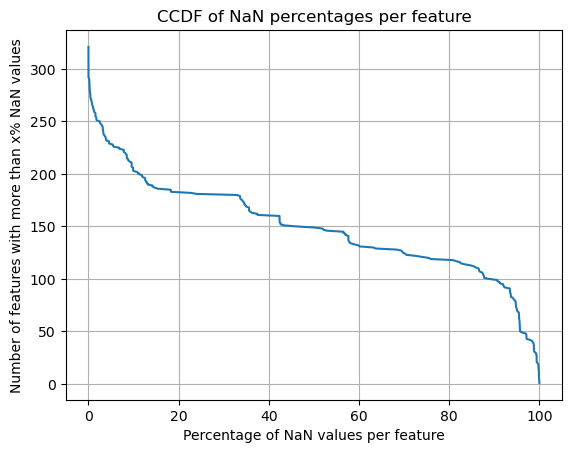

In [7]:
# Percentage of NaN values per feature
nan_percentage = np.mean(np.isnan(x_train), axis=0) * 100
# Cummulative distribution function of NaN percentages
sorted_nan_percentage = np.sort(nan_percentage)
plt.plot(sorted_nan_percentage, np.arange(len(sorted_nan_percentage), 0, -1))
plt.xlabel('Percentage of NaN values per feature')
plt.ylabel('Number of features with more than x% NaN values')
plt.title('CCDF of NaN percentages per feature')
plt.grid()
plt.show()

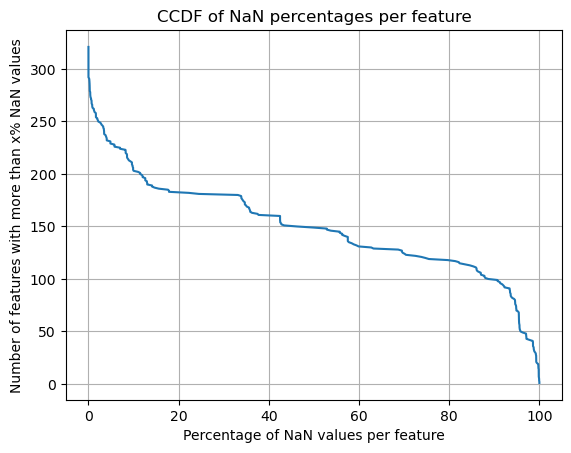

In [8]:
# Pandas version
# Plot ccdf of NaN percentages
nan_percentage = df_x_train.isna().mean() * 100
sorted_nan_percentage = np.sort(nan_percentage)
plt.plot(sorted_nan_percentage, np.arange(len(sorted_nan_percentage), 0, -1))
plt.xlabel('Percentage of NaN values per feature')
plt.ylabel('Number of features with more than x% NaN values')
plt.title('CCDF of NaN percentages per feature')
plt.grid()
plt.show()


## Replace missing values by the mean of the feature

In [9]:
mean_imputation(x_train, x_test)
# If using pandas
df_x_train.fillna(df_x_train.mean(), inplace=True)

## Correlation between features

c:\Users\natha\miniconda3\envs\ML_course\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\natha\miniconda3\envs\ML_course\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


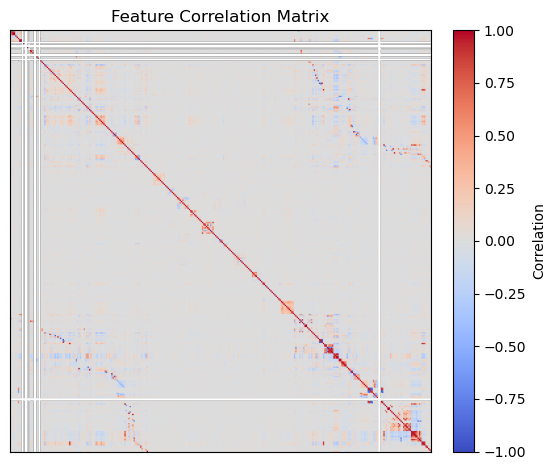

In [10]:
# Compute correlation matrix (each row is an observation, each column a feature)
corr = np.corrcoef(x_train, rowvar=False)

# Plot heatmap
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04, label="Correlation")
plt.xticks([])
plt.yticks([])
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

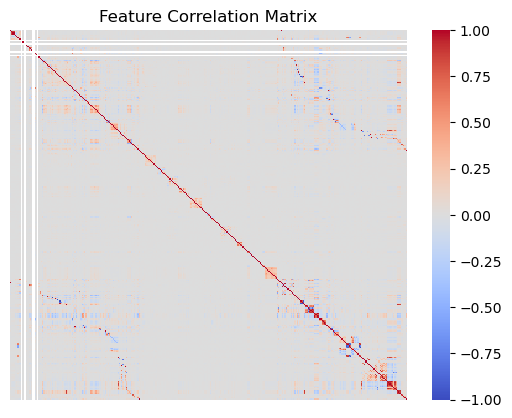

In [ ]:
# Pandas version
# Compute correlation matrix (rows=features)
corr_pd = df_x_train.corr()
# Plot heatmap without axis ticks
sns.heatmap(corr_pd, cmap="coolwarm", vmin=-1, vmax=1, xticklabels=False, yticklabels=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [11]:
# Optionally print highly correlated pairs
threshold = 0.9
print(f"\nHighly correlated features (|corr| > {threshold}):")
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[1]):
        if abs(corr[i, j]) > threshold:
            print(f"  {feature_names[i]} ↔ {feature_names[j]} : {corr[i, j]:.2f}")


Highly correlated features (|corr| > 0.9):
  _STATE ↔ _STSTR : 1.00
  IDATE ↔ IMONTH : 1.00
  SEQNO ↔ _PSU : 1.00
  HLTHPLN1 ↔ _HCVU651 : 0.94
  BPHIGH4 ↔ _RFHYPE5 : -0.99
  BLOODCHO ↔ _CHOLCHK : 0.96
  TOLDHI2 ↔ _RFCHOL : -1.00
  ASTHMA3 ↔ _LTASTH1 : -1.00
  ASTHMA3 ↔ _ASTHMS1 : 0.95
  HAVARTH3 ↔ _DRDXAR1 : 1.00
  HAVARTH3 ↔ _LMTACT1 : 0.90
  EDUCA ↔ _EDUCAG : 0.99
  INCOME2 ↔ _INCOMG : 0.98
  ALCDAY5 ↔ DRNKANY5 : 1.00
  DRNK3GE5 ↔ _RFBING5 : -0.92
  EXERANY2 ↔ _TOTINDA : 1.00
  EXERHMM1 ↔ PADUR1_ : 1.00
  EXERHMM2 ↔ PADUR2_ : 1.00
  HIVTST6 ↔ _AIDTST3 : 1.00
  ASATTACK ↔ ASINHALR : 0.91
  _STRWT ↔ _WT2RAKE : 0.95
  _CRACE1 ↔ _CPRACE : 1.00
  _LTASTH1 ↔ _ASTHMS1 : -0.95
  _CASTHM1 ↔ _ASTHMS1 : -0.94
  _DRDXAR1 ↔ _LMTACT1 : 0.90
  _RACE ↔ _RACEGR3 : 0.99
  _AGEG5YR ↔ _AGE80 : 0.99
  _AGEG5YR ↔ _AGE_G : 0.97
  _AGE80 ↔ _AGE_G : 0.97
  HTIN4 ↔ HTM4 : 0.99
  _MISFRTN ↔ _FRTRESP : -0.96
  _MISFRTN ↔ _FRUITEX : 0.96
  _MISVEGN ↔ _VEGRESP : -0.92
  _MISVEGN ↔ _VEGETEX : 0.92
  _FRTRESP ↔ _F

## Principal Component Analysis (PCA)

Keeping 5 components explaining 100.00% variance


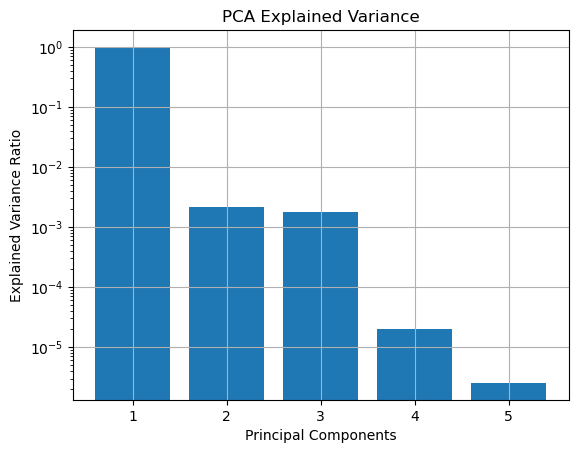

In [12]:
x_train_pca, eigvecs, explained_variance = pca_reduce(x_train, variance_threshold=1-1e-6)

plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance)
plt.yscale('log')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

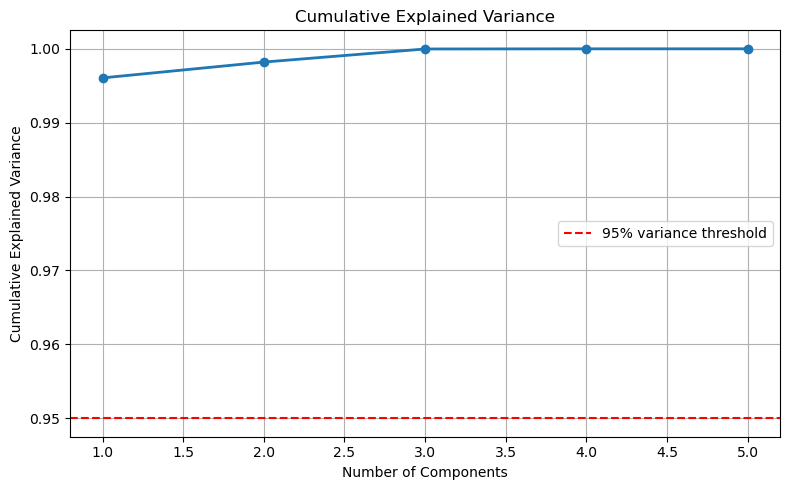

In [14]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


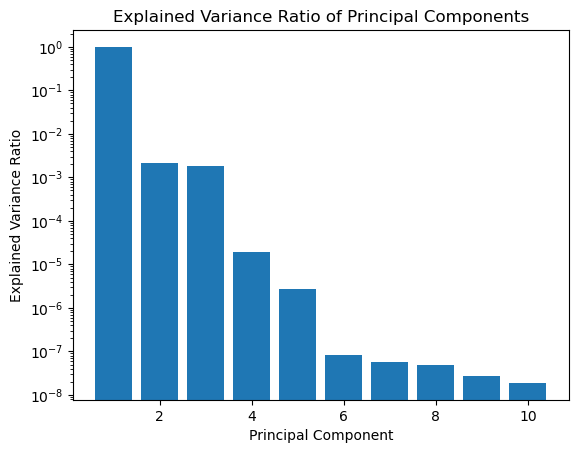

In [15]:
# using pandas and sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_reduce = pca.fit_transform(df_x_train.fillna(df_x_train.mean()))

# Plot the explained variance ratio, y log scale
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.yscale('log')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Logistic Regression

Still in progress...

In [16]:
y_train_bin = (y_train == 1).astype(int)

max_iters = 1000      # number of gradient descent steps
gamma = 0.01          # learning rate
initial_w = np.zeros(x_train_pca.shape[1])

w, loss = logistic_regression(y_train_bin, x_train_pca, initial_w, max_iters, gamma)
print(f"Final training loss: {loss:.4f}")

c:\Users\natha\Desktop\EPFL\MilaLyon\implementations.py:164: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))


Final training loss: 2124071468649802.2500


In [43]:
def predict_labels(tx, w, threshold=0.5):
    pred = sigmoid(tx @ w)
    return (pred >= threshold).astype(int)

In [44]:
y_pred_train = predict_labels(x_train_pca, w)

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

acc_train = compute_accuracy(y_train_bin, y_pred_train)

print(f"Training accuracy: {acc_train*100:.2f}%")


NameError: name 'sigmoid' is not defined